In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset

In [164]:
df = pd.read_csv('hour.csv', index_col='instant')
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [166]:
categories_columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'C', 'cnt']
date_columns = ['dteday']

In [167]:
mixed_indexes = np.random.permutation(len(df))

In [168]:
train_size = int(0.8 * len(df))
df_train = df.iloc[ mixed_indexes, : ][:train_size]
df_test = df.iloc[ mixed_indexes, : ][train_size:]
df_train.shape[0] + df_test.shape[0] == df.shape[0]

True

Future preprocessing for train. Pipeline for test preprocessing will be created later

# Data analysis

Drop casual and registered as terms of cnt

In [169]:
df_train = df_train.drop(['casual', 'registered'], axis=1)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [173]:
X_train = df_train.drop(['cnt'], axis=1)
y_train = df_train.loc[:, 'cnt']
X.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,,,
2671,2011-04-26,2,0,4,4,0,2,1,1,0.56,0.5303,0.83,0.2537
960,2011-02-12,1,0,2,14,0,6,0,1,0.34,0.3182,0.31,0.2836
16446,2012-11-22,4,1,11,23,1,4,0,1,0.30,0.3333,0.70,0.0000
11451,2012-04-27,2,1,4,7,0,5,1,1,0.38,0.3939,0.50,0.2836
8490,2011-12-25,1,0,12,10,0,0,0,1,0.26,0.2424,0.81,0.2537


In [174]:
y_train.head()

instant
2671       6
960      120
16446     36
11451    315
8490      43
Name: cnt, dtype: int64

<AxesSubplot:>

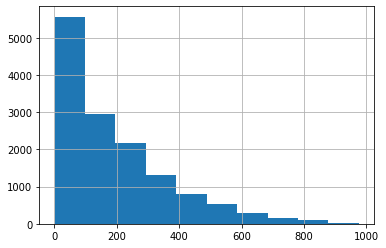

In [175]:
y_train.hist()

Drop dteday because in year, month

In [176]:
X_train = X_train.drop('dteday', axis=1)
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,,
2671,2,0,4,4,0,2,1,1,0.56,0.5303,0.83,0.2537
960,1,0,2,14,0,6,0,1,0.34,0.3182,0.31,0.2836
16446,4,1,11,23,1,4,0,1,0.30,0.3333,0.70,0.0000
11451,2,1,4,7,0,5,1,1,0.38,0.3939,0.50,0.2836
8490,1,0,12,10,0,0,0,1,0.26,0.2424,0.81,0.2537


## Correlation analysis

<AxesSubplot:>

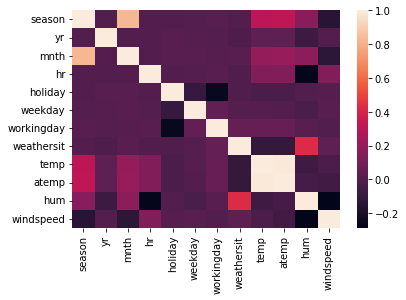

In [177]:
sns.heatmap(X_train.corr())

High correlation: season and month, temp and atemp. Drop temp

In [178]:
X_train = X_train.drop('temp', axis=1)
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
instant,,,,,,,,,,,
2671,2,0,4,4,0,2,1,1,0.5303,0.83,0.2537
960,1,0,2,14,0,6,0,1,0.3182,0.31,0.2836
16446,4,1,11,23,1,4,0,1,0.3333,0.70,0.0000
11451,2,1,4,7,0,5,1,1,0.3939,0.50,0.2836
8490,1,0,12,10,0,0,0,1,0.2424,0.81,0.2537


In [179]:
pca = PCA(n_components=1)
temp = X_train.loc[:, ['season', 'mnth']]
temp['year_season'] = pca.fit_transform(temp)
X_train = X_train.drop(['season', 'mnth'], axis=1)
X_train['year_season'] = temp['year_season'] 
X_train.head()

,yr,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,year_season
instant,,,,,,,,,,
2671,0,4,0,2,1,1,0.5303,0.83,0.2537,2.608140
960,0,14,0,6,0,1,0.3182,0.31,0.2836,4.801456
16446,1,23,1,4,0,1,0.3333,0.70,0.0000,-4.671567
11451,1,7,0,5,1,1,0.3939,0.50,0.2836,2.608140
8490,0,10,0,0,0,1,0.2424,0.81,0.2537,-4.842130


In [180]:
X_train.loc[:, 'hum'] = StandardScaler().fit_transform(X_train.loc[:, 'hum'].values.reshape(-1, 1))
X_train.loc[:, 'windspeed'] = StandardScaler().fit_transform(X_train.loc[:, 'windspeed'].values.reshape(-1, 1))
X_train.loc[:, 'year_season'] = StandardScaler().fit_transform(X_train.loc[:, 'year_season'].values.reshape(-1, 1))
X_train.head()

,yr,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,year_season
instant,,,,,,,,,,
2671,0,4,0,2,1,1,0.5303,1.042366,0.524114,0.731722
960,0,14,0,6,0,1,0.3182,-1.646138,0.769225,1.347064
16446,1,23,1,4,0,1,0.3333,0.370240,-1.555645,-1.310624
11451,1,7,0,5,1,1,0.3939,-0.663800,0.769225,0.731722
8490,0,10,0,0,0,1,0.2424,0.938962,0.524114,-1.358476
